In [1]:
#for reading csvs
import pandas as pd

#for data storage and linear algebra
import numpy as np

#for plotting
from matplotlib import pyplot as plt

#for PCA
from sklearn.decomposition import PCA

#for knn
from sklearn.neighbors import KNeighborsClassifier

#for data normalization (x-mean)/st_dev
from sklearn.preprocessing import StandardScaler

#to combine processes 
from sklearn.pipeline import Pipeline

#for generating train test splits
from sklearn.model_selection import train_test_split

#for computing accuracy
from sklearn.metrics import accuracy_score

#for our own sklearn class
from sklearn.base import BaseEstimator

# Sklearn Example!

In [3]:
# load the data
csv_data = pd.read_csv('iris_data.csv', index_col = 0)
csv_data.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Label
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
# make numpy arrays of the data
feature_list = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4']
X = np.array(csv_data[feature_list])
y = np.array(csv_data['Label'])


In [5]:
# train-test splits
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

In [6]:
# make a pca pipeline
pca_pipeline = Pipeline(
        [
            ("scaler", StandardScaler()),
            ("pca", PCA(n_components= 2))
        ])
pca_pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2))])

Text(0.5, 1.0, 'Training Data')

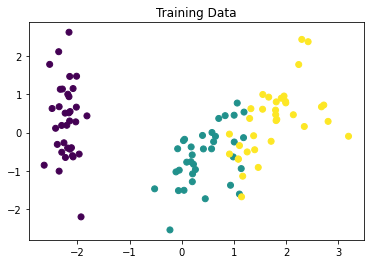

In [8]:
# do a pca transform for training data
pca_transformed = pca_pipeline.fit_transform(X_train)
plt.scatter(pca_transformed[:,0], pca_transformed[:,1], c = y_train)
plt.title('Training Data')

Text(0.5, 1.0, 'Test Data')

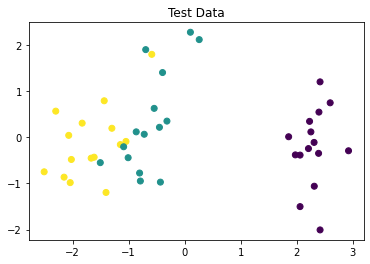

In [9]:
# do a pca transform for test data
pca_transformed = pca_pipeline.fit_transform(X_test)
plt.scatter(pca_transformed[:,0], pca_transformed[:,1], c = y_test)
plt.title('Test Data')

In [10]:
#make a classifier pipeline
classifier_pipeline =    Pipeline(
        [
            ("scaler", StandardScaler()),
            ("knn", KNeighborsClassifier(n_neighbors=5)),
        ])
classifier_pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [11]:
#fit the pipeline to the training data
classifier_pipeline = classifier_pipeline.fit(X_train, y_train)

In [12]:
# test the pipeline on the test data
t_test = classifier_pipeline.predict(X_test)

In [13]:
# compute the classification accuracy
acc = round(accuracy_score(t_test, y_test), 2)*100
print(f'The classifier was {acc}% accurate') 

The classifier was 91.0% accurate


# Rough PCA from Scratch

In [15]:
class myPCA(BaseEstimator):
    '''
        This is a class that does PCA. 
        It's the best. 
        Believe me. 
        The best.
    '''
    def __init__(self, n_components: int, evecs: np.array = None):
        self.n_components = n_components
        self.evecs = evecs

    # def __repr__(self):
    #     print(f'myPCA with {self.n_components} components')

    def fit(self, X: np.array) -> None:

        X = self.mean_center_columns(X)

        _, _, evecs = np.linalg.svd(X)

        self.evecs = evecs.T


    def transform(self, X: np.array) -> np.array:
        X = self.mean_center_columns(X)

        transformed =  X @ self.evecs[:,:self.n_components]

        return transformed
    
    def fit_transform(self, X: np.array, y: np.array = None) -> np.array:

        self.fit(X)

        return self.transform(X)

    def mean_center_columns(self, X: np.array) -> np.array:
        #check that the column means are 0
        column_means = np.mean(X, axis = 0)
        column_mean_norms = np.linalg.norm(column_means)

        if np.isclose(column_mean_norms, 0):
            print('mean centering columns...')
            X = X - column_mean_norms
        
        return X


mean centering columns...
mean centering columns...


Text(0.5, 1.0, 'Training Data')

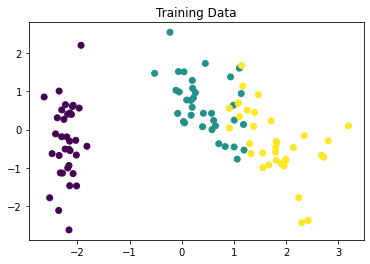

In [16]:
# do a pca transform for training data
my_pca = myPCA(n_components = 2)
ss = StandardScaler()

X_transform = ss.fit_transform(X_train)
pca_transformed = my_pca.fit_transform(X_transform)
plt.scatter(pca_transformed[:,0], pca_transformed[:,1], c = y_train)
plt.title('Training Data')

In [17]:
# make a pca pipeline
my_pca_pipeline = Pipeline(
        [("scaler", StandardScaler()),
         ("pca", myPCA(n_components = 2))
        ])
my_pca_pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('pca', myPCA(n_components=2))])

mean centering columns...
mean centering columns...


Text(0.5, 1.0, 'Training Data')

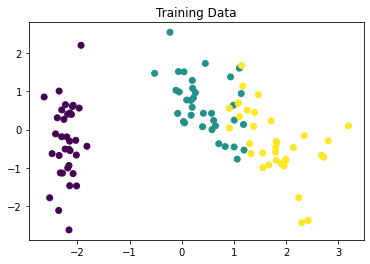

In [18]:
# do a pca transform for training data
pca_transformed = my_pca_pipeline.fit_transform(X_train)
plt.scatter(pca_transformed[:,0], pca_transformed[:,1], c = y_train)
plt.title('Training Data')

# Running it on a remote machine

from https://fizzylogic.nl/2017/11/06/edit-jupyter-notebooks-over-ssh/

* jupyter notebook --no-browser --port=8080
* ssh -N -L 8080:localhost:8080 <remote_user>@<remote_host>

# Some python practice!

https://leetcode.com/